In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import random
import matplotlib as mpl

In [2]:
plt.rcParams["figure.figsize"] = (8,6)
colormap = plt.get_cmap('cool')

In [3]:
%matplotlib notebook

In [47]:
def pendulum(x1, x2, v1, v2, parameters):
    k1, k2, m1, m2 = parameters
    return (v1, v2, -k1/m1*x1 + k2/m1*(x2 - x1), -k1/m2*x2 + k2/m2*(x1 - x2))

In [48]:
def runge_kutta4(function, iterations, initial, step, parameters):
    x1_val = [initial[0]]
    x2_val = [initial[1]]
    x3_val = [initial[2]]
    x4_val = [initial[3]]
    t_val = [0]
    for i in range(round(iterations/step)):
        x11, x21, x31, x41 = function(x1_val[-1], x2_val[-1], x3_val[-1], x4_val[-1], parameters)
        x12, x22, x32, x42 = function(x1_val[-1]+step*x11/2, x2_val[-1]+step*x21/2, x3_val[-1]+step*x31/2, x4_val[-1]+step*x41/2, parameters)
        x13, x23, x33, x43 = function(x1_val[-1]+step*x12/2, x2_val[-1]+step*x22/2, x3_val[-1]+step*x32/2, x4_val[-1]+step*x42/2, parameters)
        x14, x24, x34, x44 = function(x1_val[-1]+step*x13, x2_val[-1]+step*x23, x3_val[-1]+step*x33, x4_val[-1]+step*x43, parameters)
        
        x1_val.append(x1_val[-1]+step*(x11+2*x12+2*x13+x14)/6)
        x2_val.append(x2_val[-1]+step*(x21+2*x22+2*x23+x24)/6)
        x3_val.append(x3_val[-1]+step*(x31+2*x32+2*x33+x34)/6)
        x4_val.append(x4_val[-1]+step*(x41+2*x42+2*x43+x44)/6)
        t_val.append(t_val[-1]+step)
    return t_val, x1_val, x2_val, x3_val, x4_val

In [53]:
iterations = 50
initial = (1, 1, 0, 0)
step = 0.01
parameters = (0.5, 0.5, 1, 1)
t_val, x1_val, x2_val, x3_val, x4_val = runge_kutta4(pendulum, iterations, initial, step, parameters)

<IPython.core.display.Javascript object>


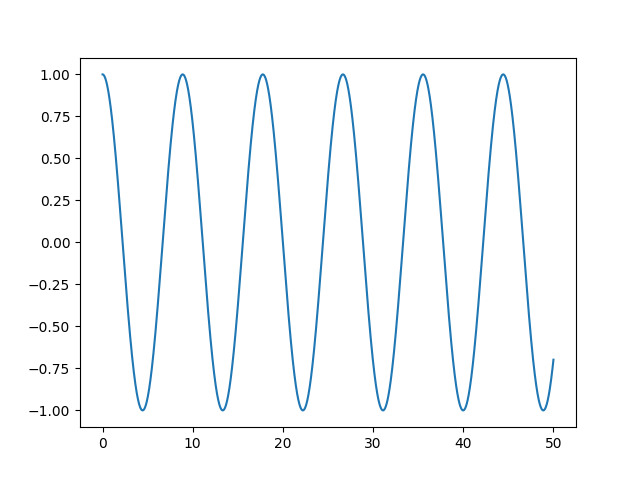

In [52]:
plt.plot(t_val, x1_val)